# 카카오톡 대화내용 가져오기

## 카카오톡 대화

In [190]:
# pip install konlpy

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm

In [192]:
import pandas as pd
data=pd.read_csv('chat_data\KakaoTalkChats-2.txt', sep='\t', engine='python', encoding='utf-8')
data

,채팅분석 4 카카오톡 대화
0,저장한 날짜 : 2022년 12월 15일 오후 4:24
1,2022년 12월 15일 오후 4:20
2,"2022년 12월 15일 오후 4:20, 김진하님이 ㅇㅇㅂ 성가은님, ㅇㅇㅂ 나현진..."
3,"2022년 12월 15일 오후 4:20, 김진하 : 애들아 우리 어디 갈까?"
4,"2022년 12월 15일 오후 4:21, 김진하 : 카페를 먼저 갔다가 술 먹으러 ..."
5,"2022년 12월 15일 오후 4:21, ㅇㅇㅂ 성가은 : 글쎄 술먹을래?"
6,"2022년 12월 15일 오후 4:21, ㅇㅇㅂ 윤별 : 카페는 넓고 사람 별로 없..."
7,"2022년 12월 15일 오후 4:21, ㅇㅇㅂ 성가은 : 그럼 카페가쟈"
8,"2022년 12월 15일 오후 4:21, 김진하 : 디저트 먹을거야?"
9,"2022년 12월 15일 오후 4:21, ㅇㅇㅂ 성가은 : 디저트 맛있는곳 가자"


In [193]:
print(data.columns[0])

채팅분석 4 카카오톡 대화


In [194]:
a=data.loc[2]
print(a)
print(type(a))

채팅분석 4 카카오톡 대화    2022년 12월 15일 오후 4:20, 김진하님이 ㅇㅇㅂ 성가은님, ㅇㅇㅂ 나현진...
Name: 2, dtype: object
<class 'pandas.core.series.Series'>


* 데이터 하나 가져와서 데이터프레임으로 변경

In [195]:
b=list(a)
print(b)

['2022년 12월 15일 오후 4:20, 김진하님이 ㅇㅇㅂ 성가은님, ㅇㅇㅂ 나현진님과 ㅇㅇㅂ 윤별님을 초대했습니다.']


In [196]:
# split으로 , 기준으로 분리 후 2번째 말 한 사람 대화내용 가져오기
c=b[0].split(',', 2)
c[1]

' 김진하님이 ㅇㅇㅂ 성가은님'

In [197]:
d=data.loc[4]
e=list(d)
f=e[0].split(',', 2)
f

['2022년 12월 15일 오후 4:21', ' 김진하 : 카페를 먼저 갔다가 술 먹으러 갈까??']

* for문 활용하여 데이터 정리

In [198]:
# try, except로 예외처리, for문 이용하여 대화내용 list에 담기
content_all=[]
for i in data[data.columns[0]]:
    content=i.split(',', 2)
    try:
        content2=content[1].split(':', 2)
        content_all.append(content[0] + ',' + content2[0] + ',' + content2[1])
    except:
        continue

In [199]:
content_all

['2022년 12월 15일 오후 4:20, 김진하 , 애들아 우리 어디 갈까?',
 '2022년 12월 15일 오후 4:21, 김진하 , 카페를 먼저 갔다가 술 먹으러 갈까??',
 '2022년 12월 15일 오후 4:21, ㅇㅇㅂ 성가은 , 글쎄 술먹을래?',
 '2022년 12월 15일 오후 4:21, ㅇㅇㅂ 윤별 , 카페는 넓고 사람 별로 없는곳 가자',
 '2022년 12월 15일 오후 4:21, ㅇㅇㅂ 성가은 , 그럼 카페가쟈',
 '2022년 12월 15일 오후 4:21, 김진하 , 디저트 먹을거야?',
 '2022년 12월 15일 오후 4:21, ㅇㅇㅂ 성가은 , 디저트 맛있는곳 가자',
 '2022년 12월 15일 오후 4:21, ㅇㅇㅂ 성가은 , 케익먹고싶어 ㅠㅠ',
 '2022년 12월 15일 오후 4:21, 김진하 , 자리 넓은 곳이 좋아 디저트 맛있는 곳이 좋아?',
 '2022년 12월 15일 오후 4:21, ㅇㅇㅂ 성가은 , 디저트!',
 '2022년 12월 15일 오후 4:22, ㅇㅇㅂ 윤별 , 나두 디저트 맛있는곳~~',
 '2022년 12월 15일 오후 4:22, ㅇㅇㅂ 성가은 , 다들 어떠심?',
 '2022년 12월 15일 오후 4:22, ㅇㅇㅂ 윤별 , 좋아요',
 '2022년 12월 15일 오후 4:22, ㅇㅇㅂ 성가은 , 오케이~',
 '2022년 12월 15일 오후 4:22, ㅇㅇㅂ 윤별 , 술 말고 밥부터 먹자',
 '2022년 12월 15일 오후 4:22, ㅇㅇㅂ 윤별 , 양식은 별로야',
 '2022년 12월 15일 오후 4:22, ㅇㅇㅂ 나현진 , 조용한 곳 가서 수다나 떨자! ',
 '2022년 12월 15일 오후 4:23, 김진하 , 일식은 어때?',
 '2022년 12월 15일 오후 4:23, 김진하 , 이자카야 갈까?',
 '2022년 12월 15일 오후 4:23, ㅇㅇㅂ 성가은 , 이지카야 좋지~',
 '2022년 12월 15일 오후 4:23, ㅇㅇㅂ 성가은 , 사케 먹자',
 '2022년 12월 15

* 데이터프레임 정리
    - column을 data, name, content로 분리

In [200]:
get_data=[]
get_name=[]
get_content=[]
for i in content_all:
    ii=i.split(',', 3)
    get_data.append(ii[0])
    get_name.append(ii[1])
    get_content.append(ii[2])

In [201]:
content_df=pd.DataFrame(data=get_data, columns=['data'])
content_df

,data
0,2022년 12월 15일 오후 4:20
1,2022년 12월 15일 오후 4:21
2,2022년 12월 15일 오후 4:21
3,2022년 12월 15일 오후 4:21
4,2022년 12월 15일 오후 4:21
5,2022년 12월 15일 오후 4:21
6,2022년 12월 15일 오후 4:21
7,2022년 12월 15일 오후 4:21
8,2022년 12월 15일 오후 4:21
9,2022년 12월 15일 오후 4:21


In [202]:
content_df['name']=get_name
content_df['content']=get_content
content_df

,data,name,content
0,2022년 12월 15일 오후 4:20,김진하,애들아 우리 어디 갈까?
1,2022년 12월 15일 오후 4:21,김진하,카페를 먼저 갔다가 술 먹으러 갈까??
2,2022년 12월 15일 오후 4:21,ㅇㅇㅂ 성가은,글쎄 술먹을래?
3,2022년 12월 15일 오후 4:21,ㅇㅇㅂ 윤별,카페는 넓고 사람 별로 없는곳 가자
4,2022년 12월 15일 오후 4:21,ㅇㅇㅂ 성가은,그럼 카페가쟈
5,2022년 12월 15일 오후 4:21,김진하,디저트 먹을거야?
6,2022년 12월 15일 오후 4:21,ㅇㅇㅂ 성가은,디저트 맛있는곳 가자
7,2022년 12월 15일 오후 4:21,ㅇㅇㅂ 성가은,케익먹고싶어 ㅠㅠ
8,2022년 12월 15일 오후 4:21,김진하,자리 넓은 곳이 좋아 디저트 맛있는 곳이 좋아?
9,2022년 12월 15일 오후 4:21,ㅇㅇㅂ 성가은,디저트!


* 대화내용 단어 빈도수 확인

In [203]:
content_series=content_df['content']

In [204]:
import nltk

total_tokens=[token for msg in content_series for token in str(msg).split()]
print(len(total_tokens))
print('-'*50)
text=nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
print(text.vocab().most_common(20))

92
--------------------------------------------------
77
[('디저트', 4), ('우리', 2), ('갈까?', 2), ('술', 2), ('가자', 2), ('그럼', 2), ('곳이', 2), ('먹자', 2), ('가서', 2), ('이자카야', 2), ('디저트도', 2), ('많이', 2), ('치킨가라아게', 2), ('애들아', 1), ('어디', 1), ('카페를', 1), ('먼저', 1), ('갔다가', 1), ('먹으러', 1), ('갈까??', 1)]


* 대화내용 빈도 시각화

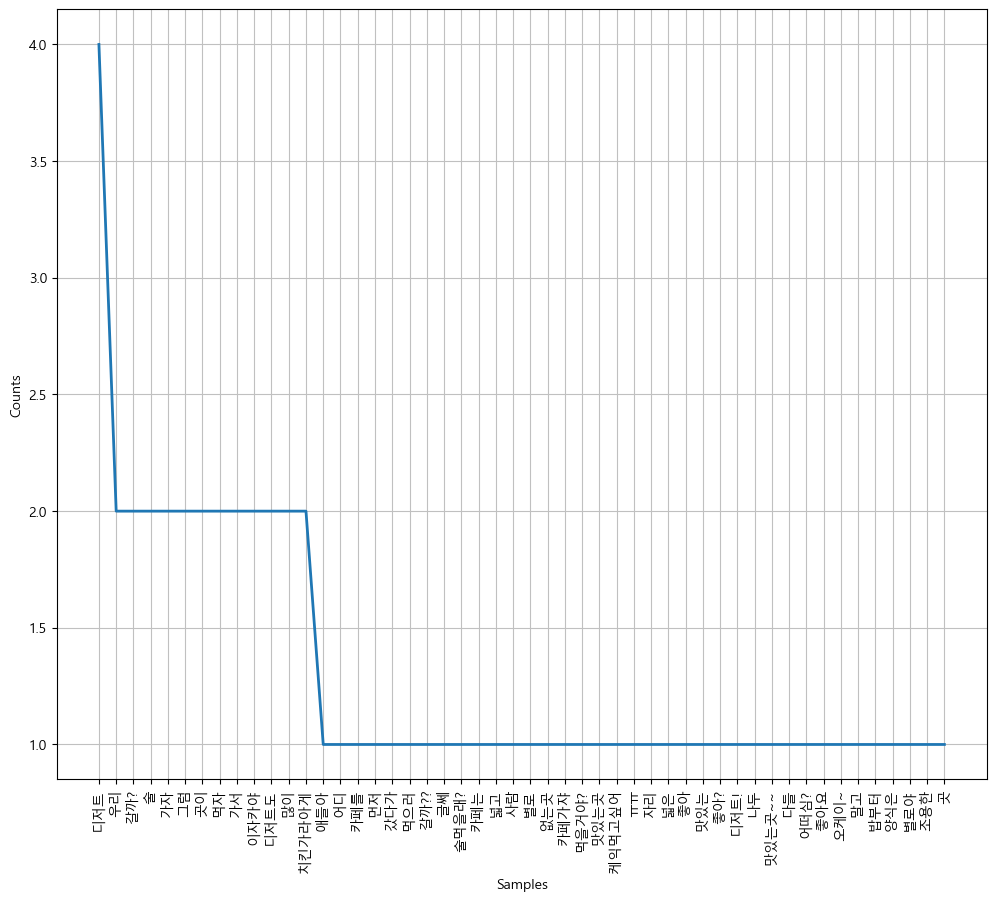

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [205]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc


font_path = "malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.figure(figsize=(12, 10))
text.plot(50)

* 백업

In [206]:
content_df2=content_df.copy()
content_series2=content_df2['content']
content_series2

0                         애들아 우리 어디 갈까?
1                 카페를 먼저 갔다가 술 먹으러 갈까??
2                              글쎄 술먹을래?
3                   카페는 넓고 사람 별로 없는곳 가자
4                               그럼 카페가쟈
5                             디저트 먹을거야?
6                           디저트 맛있는곳 가자
7                             케익먹고싶어 ㅠㅠ
8            자리 넓은 곳이 좋아 디저트 맛있는 곳이 좋아?
9                                  디저트!
10                        나두 디저트 맛있는곳~~
11                              다들 어떠심?
12                                  좋아요
13                                 오케이~
14                          술 말고 밥부터 먹자
15                              양식은 별로야
16                    조용한 곳 가서 수다나 떨자! 
17                              일식은 어때?
18                             이자카야 갈까?
19                             이지카야 좋지~
20                                사케 먹자
21     우리 디저트도 많이 먹고 이자카야 가서 안주도 많이 먹으면
22                          배가 터지지 않을까?
23                           나는 치킨가라아게 
24                                배 안터져


* 메시지 전처리 함수

In [207]:
import re

def message_cleaning(docs):

    # Series의 object를 str로 변경
    docs=[str(doc) for doc in docs]

    # 1. 쓸모없는 단어 삭제
    pattern1=re.compile("<사진|동영상")
    docs=[pattern1.sub("", doc) for doc in docs] 

    pattern2=re.compile("읽지|않음>")
    docs=[pattern2.sub("", doc) for doc in docs] 

    # 2. 단순 자음, 모음 삭제
    #pattern3=re.compile("[ㄱ-ㅎ]*[ㅏ-ㅢ]*")
    #docs=[pattern3.sub("", doc) for doc in docs] 

    # 3. 링크로 되어있는 글 삭제
    #pattern4=re.compile(r"\b(https?:\/\/)?([\w.]+){1, 2}(\.[\w]{2, 4}){1, 2}(.*)")
    #docs=[pattern4.sub("", doc) for doc in docs] 

    # 4. 특수문자 삭제
    pattern5=re.compile("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")
    docs=[pattern5.sub("", doc) for doc in docs] 

     # 5. 이모티콘 삭제
    pattern6=re.compile("이모티콘")
    docs=[pattern6.sub("", doc) for doc in docs]

    return docs

def define_stopwords(path):
    SW=set()
    # 불용어 추가 하는 방법
    # 1. SW.add()
    # 2. stopwords-ko.txt에 직접 추가

    with open(path, encoding='utf-8') as f:
        for word in f:
            SW.add(word)
    
    return SW

In [208]:
# SW=define_stopwords("stopwords-ko.txt")
# 카카오톡 텍스트 정제
cleaned_corpus=message_cleaning(content_series2)
print(len(cleaned_corpus))
print(cleaned_corpus[:10])

29
[' 애들아 우리 어디 갈까', ' 카페를 먼저 갔다가 술 먹으러 갈까', ' 글쎄 술먹을래', ' 카페는 넓고 사람 별로 없는곳 가자', ' 그럼 카페가쟈', ' 디저트 먹을거야', ' 디저트 맛있는곳 가자', ' 케익먹고싶어 ㅠㅠ', ' 자리 넓은 곳이 좋아 디저트 맛있는 곳이 좋아', ' 디저트']


* 단어 삭제 후 띄어쓰기 부분 제거 및 빈 단어 행 삭제

In [209]:
# 띄어쓰기 된 부분 앞뒤로 붙여주기
cleaned_corpus2=[]
for i in cleaned_corpus:
    cleaned_corpus2.append(i.strip())

# 단어 삭제 후 빈 행 삭제
cleaned_text=pd.Series(cleaned_corpus2)
content_df2['content']=cleaned_text

cleaned_data=content_df2[content_df2['content']!=""]
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   data     29 non-null     object
 1   name     29 non-null     object
 2   content  29 non-null     object
dtypes: object(3)
memory usage: 928.0+ bytes


In [210]:
cleaned_data.head()

,data,name,content
0,2022년 12월 15일 오후 4:20,김진하,애들아 우리 어디 갈까
1,2022년 12월 15일 오후 4:21,김진하,카페를 먼저 갔다가 술 먹으러 갈까
2,2022년 12월 15일 오후 4:21,ㅇㅇㅂ 성가은,글쎄 술먹을래
3,2022년 12월 15일 오후 4:21,ㅇㅇㅂ 윤별,카페는 넓고 사람 별로 없는곳 가자
4,2022년 12월 15일 오후 4:21,ㅇㅇㅂ 성가은,그럼 카페가쟈


In [211]:
cleaned_data.drop(['name'], axis=1, inplace=True)
cleaned_data

,data,content
0,2022년 12월 15일 오후 4:20,애들아 우리 어디 갈까
1,2022년 12월 15일 오후 4:21,카페를 먼저 갔다가 술 먹으러 갈까
2,2022년 12월 15일 오후 4:21,글쎄 술먹을래
3,2022년 12월 15일 오후 4:21,카페는 넓고 사람 별로 없는곳 가자
4,2022년 12월 15일 오후 4:21,그럼 카페가쟈
5,2022년 12월 15일 오후 4:21,디저트 먹을거야
6,2022년 12월 15일 오후 4:21,디저트 맛있는곳 가자
7,2022년 12월 15일 오후 4:21,케익먹고싶어 ㅠㅠ
8,2022년 12월 15일 오후 4:21,자리 넓은 곳이 좋아 디저트 맛있는 곳이 좋아
9,2022년 12월 15일 오후 4:21,디저트


* pickle로 저장

In [212]:
# import pickle

# with open("/content/drive/MyDrive/aivle/카톡 채팅 분석/cleaned_data.pk", "wb") as f:
#     pickle.dump(cleaned_data, f)

In [213]:
content_series=cleaned_data['content']
total_tokens2=[token for msg in content_series for token in str(msg).split()]
print(len(total_tokens2))
print('-'*50)
text=nltk.Text(total_tokens2, name='NMSC')
print(len(set(text.tokens)))

92
--------------------------------------------------
72


In [214]:
text.vocab().most_common()

[('디저트', 5),
 ('갈까', 3),
 ('좋아', 3),
 ('우리', 2),
 ('술', 2),
 ('가자', 2),
 ('그럼', 2),
 ('맛있는곳', 2),
 ('곳이', 2),
 ('먹자', 2),
 ('가서', 2),
 ('이자카야', 2),
 ('디저트도', 2),
 ('많이', 2),
 ('치킨가라아게', 2),
 ('애들아', 1),
 ('어디', 1),
 ('카페를', 1),
 ('먼저', 1),
 ('갔다가', 1),
 ('먹으러', 1),
 ('글쎄', 1),
 ('술먹을래', 1),
 ('카페는', 1),
 ('넓고', 1),
 ('사람', 1),
 ('별로', 1),
 ('없는곳', 1),
 ('카페가쟈', 1),
 ('먹을거야', 1),
 ('케익먹고싶어', 1),
 ('ㅠㅠ', 1),
 ('자리', 1),
 ('넓은', 1),
 ('맛있는', 1),
 ('나두', 1),
 ('다들', 1),
 ('어떠심', 1),
 ('좋아요', 1),
 ('오케이', 1),
 ('말고', 1),
 ('밥부터', 1),
 ('양식은', 1),
 ('별로야', 1),
 ('조용한', 1),
 ('곳', 1),
 ('수다나', 1),
 ('떨자', 1),
 ('일식은', 1),
 ('어때', 1),
 ('이지카야', 1),
 ('좋지', 1),
 ('사케', 1),
 ('먹고', 1),
 ('안주도', 1),
 ('먹으면', 1),
 ('배가', 1),
 ('터지지', 1),
 ('않을까', 1),
 ('나는', 1),
 ('배', 1),
 ('안터져', 1),
 ('쌉가능', 1),
 ('오키', 1),
 ('1차로', 1),
 ('케이크', 1),
 ('조지고', 1),
 ('2차로', 1),
 ('패버려', 1),
 ('그날', 1),
 ('강남역에서', 1),
 ('만나', 1)]

* 텍스트 데이터 감성분석

In [215]:
# pip install vaderSentiment

In [216]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [217]:
# vader 결과
vaderresult=[]
# 상품리뷰 점수와 같은 경우
truecount = 0

In [218]:
# The Compound score is a metric that circulates the sum of all the lexicon ratings
# which have been normalized between -1(most extreme negative) and +1(most extreme positive).
for i in range(cleaned_data.content.count()):
    # compound결과가 0.05보다 크면 긍정, -0.05보다 작으면 부정
    if analyser.polarity_scores(cleaned_data.content[i]).get("compound")>0.05:
        vaderresult.append(1)
    elif analyser.polarity_scores(cleaned_data.content[i]).get("compound")< -0.05:
        vaderresult.append(0)
    else:
        vaderresult.append(3)

    print(cleaned_data.content[i], vaderresult[i])

    #자세히 보고 싶다면..
    #print(df.textcontent[i],analyser.polarity_scores(df.textcontent[i]))

애들아 우리 어디 갈까 3
카페를 먼저 갔다가 술 먹으러 갈까 3
글쎄 술먹을래 3
카페는 넓고 사람 별로 없는곳 가자 3
그럼 카페가쟈 3
디저트 먹을거야 3
디저트 맛있는곳 가자 3
케익먹고싶어 ㅠㅠ 3
자리 넓은 곳이 좋아 디저트 맛있는 곳이 좋아 3
디저트 3
나두 디저트 맛있는곳 3
다들 어떠심 3
좋아요 3
오케이 3
술 말고 밥부터 먹자 3
양식은 별로야 3
조용한 곳 가서 수다나 떨자 3
일식은 어때 3
이자카야 갈까 3
이지카야 좋지 3
사케 먹자 3
우리 디저트도 많이 먹고 이자카야 가서 안주도 많이 먹으면 3
배가 터지지 않을까 3
나는 치킨가라아게 3
배 안터져 3
디저트도 쌉가능 3
오키 1차로 케이크 조지고 2차로 치킨가라아게 패버려 3
그럼 그날 강남역에서 만나 3
좋아 3


In [219]:
cleaned_data2=cleaned_data.copy()
cleaned_data2.head()

,data,content
0,2022년 12월 15일 오후 4:20,애들아 우리 어디 갈까
1,2022년 12월 15일 오후 4:21,카페를 먼저 갔다가 술 먹으러 갈까
2,2022년 12월 15일 오후 4:21,글쎄 술먹을래
3,2022년 12월 15일 오후 4:21,카페는 넓고 사람 별로 없는곳 가자
4,2022년 12월 15일 오후 4:21,그럼 카페가쟈


In [220]:
# 중복인 내용이 있다면 중복 제거
cleaned_data2.drop_duplicates(subset = ['content'], inplace=True)

#한글과 공백 제외하고 모두 제거
cleaned_data2['content']=cleaned_data2['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
cleaned_data2.head(20)

C:\Users\User\AppData\Local\Temp\ipykernel_13520\1449332270.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaned_data2['content']=cleaned_data2['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,data,content
0,2022년 12월 15일 오후 4:20,애들아 우리 어디 갈까
1,2022년 12월 15일 오후 4:21,카페를 먼저 갔다가 술 먹으러 갈까
2,2022년 12월 15일 오후 4:21,글쎄 술먹을래
3,2022년 12월 15일 오후 4:21,카페는 넓고 사람 별로 없는곳 가자
4,2022년 12월 15일 오후 4:21,그럼 카페가쟈
5,2022년 12월 15일 오후 4:21,디저트 먹을거야
6,2022년 12월 15일 오후 4:21,디저트 맛있는곳 가자
7,2022년 12월 15일 오후 4:21,케익먹고싶어 ㅠㅠ
8,2022년 12월 15일 오후 4:21,자리 넓은 곳이 좋아 디저트 맛있는 곳이 좋아
9,2022년 12월 15일 오후 4:21,디저트


In [221]:
#!pip install konlpy

In [222]:
# from konlpy.tag import Okt
# okt = Okt()

# morphs=[]
# for i in range(cleaned_data2.content.count()):
#     morphs.append(okt.morphs(cleaned_data2.content[i], stem = True))
    
# cleaned_data2["morphs"]=morphs
# cleaned_data2

In [223]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '야', '고', '에서', '아', '그럼', '오키', '오케이', '애', '우리', '난']

In [224]:
# 형태고 분석기 사용하여 토큰화 하면서 불용어 제거
from tqdm import tqdm

okt=Okt()

X_train=[]
for sentence in tqdm(cleaned_data2['content']):
    tokenized_sentence = okt.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

X_train

100%|██████████| 29/29 [00:00<00:00, 1447.53it/s]


[['어디', '갈까'],
 ['카페', '먼저', '갔다가', '술', '먹으러', '갈까'],
 ['글쎄', '술', '먹을래'],
 ['카페', '넓고', '사람', '별로', '없는', '곳', '가자'],
 ['카페', '쟈'],
 ['디저트', '먹을거야'],
 ['디저트', '맛있는', '곳', '가자'],
 ['케익', '먹고싶어', 'ㅠㅠ'],
 ['자리', '넓은', '곳', '좋아', '디저트', '맛있는', '곳', '좋아'],
 ['디저트'],
 ['나', '두', '디저트', '맛있는', '곳'],
 ['다', '어떠', '심'],
 ['좋아요'],
 [],
 ['술', '말고', '밥', '부터', '먹자'],
 ['양식', '별로'],
 ['조용한', '곳', '가서', '수다', '나', '떨자'],
 ['일식', '어때'],
 ['이자카야', '갈까'],
 ['지', '카야', '좋지'],
 ['사케', '먹자'],
 ['디저트', '많이', '먹고', '이자카야', '가서', '안주', '많이', '먹으면'],
 ['배', '터지지', '않을까'],
 ['나', '치킨', '가라아게'],
 ['배', '안', '터져'],
 ['디저트', '쌉', '가능'],
 ['차로', '케이크', '조지', '차로', '치킨', '가라아게', '패', '버려'],
 ['그날', '강남역', '만나'],
 ['좋아']]

In [225]:
cleaned_data2['morphs2']=X_train
cleaned_data2

,data,content,morphs2
0,2022년 12월 15일 오후 4:20,애들아 우리 어디 갈까,"[어디, 갈까]"
1,2022년 12월 15일 오후 4:21,카페를 먼저 갔다가 술 먹으러 갈까,"[카페, 먼저, 갔다가, 술, 먹으러, 갈까]"
2,2022년 12월 15일 오후 4:21,글쎄 술먹을래,"[글쎄, 술, 먹을래]"
3,2022년 12월 15일 오후 4:21,카페는 넓고 사람 별로 없는곳 가자,"[카페, 넓고, 사람, 별로, 없는, 곳, 가자]"
4,2022년 12월 15일 오후 4:21,그럼 카페가쟈,"[카페, 쟈]"
5,2022년 12월 15일 오후 4:21,디저트 먹을거야,"[디저트, 먹을거야]"
6,2022년 12월 15일 오후 4:21,디저트 맛있는곳 가자,"[디저트, 맛있는, 곳, 가자]"
7,2022년 12월 15일 오후 4:21,케익먹고싶어 ㅠㅠ,"[케익, 먹고싶어, ㅠㅠ]"
8,2022년 12월 15일 오후 4:21,자리 넓은 곳이 좋아 디저트 맛있는 곳이 좋아,"[자리, 넓은, 곳, 좋아, 디저트, 맛있는, 곳, 좋아]"
9,2022년 12월 15일 오후 4:21,디저트,[디저트]


* 정수 인코딩

In [226]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

tokenizer.word_index

{'디저트': 1,
 '곳': 2,
 '갈까': 3,
 '카페': 4,
 '술': 5,
 '맛있는': 6,
 '좋아': 7,
 '나': 8,
 '별로': 9,
 '가자': 10,
 '먹자': 11,
 '가서': 12,
 '이자카야': 13,
 '많이': 14,
 '배': 15,
 '치킨': 16,
 '가라아게': 17,
 '차로': 18,
 '어디': 19,
 '먼저': 20,
 '갔다가': 21,
 '먹으러': 22,
 '글쎄': 23,
 '먹을래': 24,
 '넓고': 25,
 '사람': 26,
 '없는': 27,
 '쟈': 28,
 '먹을거야': 29,
 '케익': 30,
 '먹고싶어': 31,
 'ㅠㅠ': 32,
 '자리': 33,
 '넓은': 34,
 '두': 35,
 '다': 36,
 '어떠': 37,
 '심': 38,
 '좋아요': 39,
 '말고': 40,
 '밥': 41,
 '부터': 42,
 '양식': 43,
 '조용한': 44,
 '수다': 45,
 '떨자': 46,
 '일식': 47,
 '어때': 48,
 '지': 49,
 '카야': 50,
 '좋지': 51,
 '사케': 52,
 '먹고': 53,
 '안주': 54,
 '먹으면': 55,
 '터지지': 56,
 '않을까': 57,
 '안': 58,
 '터져': 59,
 '쌉': 60,
 '가능': 61,
 '케이크': 62,
 '조지': 63,
 '패': 64,
 '버려': 65,
 '그날': 66,
 '강남역': 67,
 '만나': 68}

In [227]:
cleaned_data.to_csv('kakaotalk.csv')

## 네이버리뷰 데이터

In [228]:
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x1c2bbc02610>)

In [229]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [230]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [231]:
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [232]:
# document 열의 중복 제거
train_data.drop_duplicates(subset=['document'], inplace=True)

In [233]:
import re
#알파벳과 공백을 제외하고 모두 제거
eng_text = 'do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
print(re.sub(r'[^a-zA-Z ]', '', eng_text))

do you expect people to read the FAQ etc and actually accept hard atheism


In [234]:
# 한글과 공백을 제외하고 모두 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13520\1940903025.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [235]:
train_data = train_data.dropna(how = 'any')
train_data.isna().sum()

id          0
document    0
label       0
dtype: int64

In [236]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '야', '고', '에서', '아', '그럼', '오키', '오케이']

In [237]:
X_train = []

okt=Okt()
for sentence in tqdm(train_data['document'].iloc[:100]): # sample
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|██████████| 100/100 [00:00<00:00, 252.30it/s]


In [238]:
test_data = train_data.dropna(how = 'any')
test_data.isna().sum()

id          0
document    0
label       0
dtype: int64

In [239]:
X_test = []
for sentence in tqdm(test_data['document'].iloc[:20]): # sample
    tokenized_sentence = okt.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|██████████| 20/20 [00:00<00:00, 353.53it/s]


In [240]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [241]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 688
등장 빈도가 2번 이하인 희귀 단어의 수: 619
단어 집합에서 희귀 단어의 비율: 89.97093023255815
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 66.75977653631286


In [242]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 70


In [243]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)

In [244]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [245]:
import numpy as np
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [246]:
# 빈 샘플 제거
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

91
146173


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


* 서로 다른 길이의 샘풀들의 길이 동일하게 -> 패딩

리뷰의 최대 길이 : 18
리뷰의 평균 길이 : 3.923076923076923


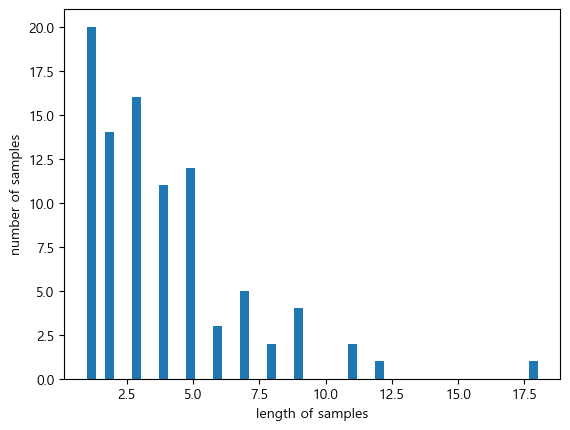

In [247]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [248]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [249]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 100.0


In [250]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

* LSTM으로 감성 분류

In [251]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint(filepath='best_model_sample.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
1/2 [==============>...............] - ETA: 2s - loss: 0.6929 - acc: 0.5156
Epoch 1: val_acc improved from -inf to 0.42105, saving model to best_model_sample.h5
2/2 [==============================] - 3s 638ms/step - loss: 0.7001 - acc: 0.4722 - val_loss: 0.6942 - val_acc: 0.4211
Epoch 2/15
1/2 [==============>...............] - ETA: 0s - loss: 0.6861 - acc: 0.7969
Epoch 2: val_acc improved from 0.42105 to 0.63158, saving model to best_model_sample.h5
2/2 [==============================] - 0s 100ms/step - loss: 0.6872 - acc: 0.7778 - val_loss: 0.6876 - val_acc: 0.6316
Epoch 3/15
1/2 [==============>...............] - ETA: 0s - loss: 0.6825 - acc: 0.6094
Epoch 3: val_acc did not improve from 0.63158
2/2 [==============================] - 0s 57ms/step - loss: 0.6831 - acc: 0.5694 - val_loss: 0.6897 - val_acc: 0.5263
Epoch 4/15
1/2 [==============>...............] - ETA: 0s - loss: 0.6786 - acc: 0.8281
Epoch 4: val_acc did not improve from 0.63158
2/2 [==========================

In [252]:
from tensorflow.keras.models import load_model

loaded_model = load_model('best_model_sample.h5')
# print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

## 예측

In [253]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  return score
#   if(score > 0.5):
#     print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
#   else:
#     print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))
#   if(score > 0.5):
#     return 1
#   else:
#     return 0

In [254]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

1/1 [==============================] - 1s 513ms/step


0.5054033398628235

In [255]:
sentiment_predict('돈까스는 싫어~')

1/1 [==============================] - 0s 38ms/step


0.5020433068275452

In [256]:
kakao=pd.read_csv('kakaotalk.csv', encoding='utf-8', index_col=0)
kakao

,data,content
0,2022년 12월 15일 오후 4:20,애들아 우리 어디 갈까
1,2022년 12월 15일 오후 4:21,카페를 먼저 갔다가 술 먹으러 갈까
2,2022년 12월 15일 오후 4:21,글쎄 술먹을래
3,2022년 12월 15일 오후 4:21,카페는 넓고 사람 별로 없는곳 가자
4,2022년 12월 15일 오후 4:21,그럼 카페가쟈
5,2022년 12월 15일 오후 4:21,디저트 먹을거야
6,2022년 12월 15일 오후 4:21,디저트 맛있는곳 가자
7,2022년 12월 15일 오후 4:21,케익먹고싶어 ㅠㅠ
8,2022년 12월 15일 오후 4:21,자리 넓은 곳이 좋아 디저트 맛있는 곳이 좋아
9,2022년 12월 15일 오후 4:21,디저트


In [257]:
result=[]
for sentence in kakao['content']:
    result.append(sentiment_predict(sentence))

print(result)

1/1 [==============================] - 0s 23ms/step
[0.5020433068275452, 0.5020433068275452, 0.5020433068275452, 0.5021611452102661, 0.5034112334251404, 0.5020433068275452, 0.5020433068275452, 0.5020433068275452, 0.5081639289855957, 0.5020433068275452, 0.5020433068275452, 0.5016239881515503, 0.5056596994400024, 0.5020433068275452, 0.5020433068275452, 0.5020433068275452, 0.5020433068275452, 0.5020433068275452, 0.5020433068275452, 0.5056596994400024, 0.5020433068275452, 0.5020433068275452, 0.5053455829620361, 0.5020433068275452, 0.5028139352798462, 0.5020433068275452, 0.5020433068275452, 0.5034112334251404, 0.5056596994400024]


In [258]:
cleaned_data['result']=result
cleaned_data

,data,content,result
0,2022년 12월 15일 오후 4:20,애들아 우리 어디 갈까,0.502043
1,2022년 12월 15일 오후 4:21,카페를 먼저 갔다가 술 먹으러 갈까,0.502043
2,2022년 12월 15일 오후 4:21,글쎄 술먹을래,0.502043
3,2022년 12월 15일 오후 4:21,카페는 넓고 사람 별로 없는곳 가자,0.502161
4,2022년 12월 15일 오후 4:21,그럼 카페가쟈,0.503411
5,2022년 12월 15일 오후 4:21,디저트 먹을거야,0.502043
6,2022년 12월 15일 오후 4:21,디저트 맛있는곳 가자,0.502043
7,2022년 12월 15일 오후 4:21,케익먹고싶어 ㅠㅠ,0.502043
8,2022년 12월 15일 오후 4:21,자리 넓은 곳이 좋아 디저트 맛있는 곳이 좋아,0.508164
9,2022년 12월 15일 오후 4:21,디저트,0.502043


In [259]:
label=[]
for i in cleaned_data['result']:
    if i<0.05:
        label.append(0)
    else:
        label.append(1)

cleaned_data['label']=label
cleaned_data

,data,content,result,label
0,2022년 12월 15일 오후 4:20,애들아 우리 어디 갈까,0.502043,1
1,2022년 12월 15일 오후 4:21,카페를 먼저 갔다가 술 먹으러 갈까,0.502043,1
2,2022년 12월 15일 오후 4:21,글쎄 술먹을래,0.502043,1
3,2022년 12월 15일 오후 4:21,카페는 넓고 사람 별로 없는곳 가자,0.502161,1
4,2022년 12월 15일 오후 4:21,그럼 카페가쟈,0.503411,1
5,2022년 12월 15일 오후 4:21,디저트 먹을거야,0.502043,1
6,2022년 12월 15일 오후 4:21,디저트 맛있는곳 가자,0.502043,1
7,2022년 12월 15일 오후 4:21,케익먹고싶어 ㅠㅠ,0.502043,1
8,2022년 12월 15일 오후 4:21,자리 넓은 곳이 좋아 디저트 맛있는 곳이 좋아,0.508164,1
9,2022년 12월 15일 오후 4:21,디저트,0.502043,1


In [260]:
cleaned_data

,data,content,result,label
0,2022년 12월 15일 오후 4:20,애들아 우리 어디 갈까,0.502043,1
1,2022년 12월 15일 오후 4:21,카페를 먼저 갔다가 술 먹으러 갈까,0.502043,1
2,2022년 12월 15일 오후 4:21,글쎄 술먹을래,0.502043,1
3,2022년 12월 15일 오후 4:21,카페는 넓고 사람 별로 없는곳 가자,0.502161,1
4,2022년 12월 15일 오후 4:21,그럼 카페가쟈,0.503411,1
5,2022년 12월 15일 오후 4:21,디저트 먹을거야,0.502043,1
6,2022년 12월 15일 오후 4:21,디저트 맛있는곳 가자,0.502043,1
7,2022년 12월 15일 오후 4:21,케익먹고싶어 ㅠㅠ,0.502043,1
8,2022년 12월 15일 오후 4:21,자리 넓은 곳이 좋아 디저트 맛있는 곳이 좋아,0.508164,1
9,2022년 12월 15일 오후 4:21,디저트,0.502043,1


In [261]:
cleaned_data.to_csv('result.csv')

## KoBERT

In [262]:
#!pip3 install kobert-transformers

In [263]:
#pip install sentencepiece

In [264]:
import urllib.request
import pandas as pd
import numpy as np
import tensorflow as tf
import sentencepiece as scm
from transformers import PreTrainedTokenizer, TFBertModel
from tqdm import tqdm

In [265]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x1c23e7c0f40>)

In [266]:
train_data = pd.read_table("ratings_train.txt").iloc[:100]
test_data = pd.read_table("ratings_test.txt").iloc[:20]

In [267]:
# coding=utf-8
# Copyright 2018 Google AI, Google Brain and Carnegie Mellon University Authors and the HuggingFace Inc. team and Jangwon Park
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
""" Tokenization classes for KoBert model."""


import logging
import os
import unicodedata
from shutil import copyfile

from transformers import PreTrainedTokenizer


logger = logging.getLogger(__name__)

VOCAB_FILES_NAMES = {"vocab_file": "tokenizer_78b3253a26.model",
                     "vocab_txt": "vocab.txt"}

PRETRAINED_VOCAB_FILES_MAP = {
    "vocab_file": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/tokenizer_78b3253a26.model",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/tokenizer_78b3253a26.model",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/tokenizer_78b3253a26.model"
    },
    "vocab_txt": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/vocab.txt",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/vocab.txt",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/vocab.txt"
    }
}

PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES = {
    "monologg/kobert": 512,
    "monologg/kobert-lm": 512,
    "monologg/distilkobert": 512
}

PRETRAINED_INIT_CONFIGURATION = {
    "monologg/kobert": {"do_lower_case": False},
    "monologg/kobert-lm": {"do_lower_case": False},
    "monologg/distilkobert": {"do_lower_case": False}
}

SPIECE_UNDERLINE = u'▁'


class KoBertTokenizer(PreTrainedTokenizer):
    """
        SentencePiece based tokenizer. Peculiarities:
            - requires `SentencePiece <https://github.com/google/sentencepiece>`_
    """
    vocab_files_names = VOCAB_FILES_NAMES
    pretrained_vocab_files_map = PRETRAINED_VOCAB_FILES_MAP
    pretrained_init_configuration = PRETRAINED_INIT_CONFIGURATION
    max_model_input_sizes = PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES

    def __init__(
            self,
            vocab_file,
            vocab_txt,
            do_lower_case=False,
            remove_space=True,
            keep_accents=False,
            unk_token="[UNK]",
            sep_token="[SEP]",
            pad_token="[PAD]",
            cls_token="[CLS]",
            mask_token="[MASK]",
            **kwargs):
        super().__init__(
            unk_token=unk_token,
            sep_token=sep_token,
            pad_token=pad_token,
            cls_token=cls_token,
            mask_token=mask_token,
            **kwargs
        )

        # Build vocab
        self.token2idx = dict()
        self.idx2token = []
        with open(vocab_txt, 'r', encoding='utf-8') as f:
            for idx, token in enumerate(f):
                token = token.strip()
                self.token2idx[token] = idx
                self.idx2token.append(token)

        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")

        self.do_lower_case = do_lower_case
        self.remove_space = remove_space
        self.keep_accents = keep_accents
        self.vocab_file = vocab_file
        self.vocab_txt = vocab_txt

        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(vocab_file)

    @property
    def vocab_size(self):
        return len(self.idx2token)

    def get_vocab(self):
        return dict(self.token2idx, **self.added_tokens_encoder)

    def __getstate__(self):
        state = self.__dict__.copy()
        state["sp_model"] = None
        return state

    def __setstate__(self, d):
        self.__dict__ = d
        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")
        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(self.vocab_file)

    def preprocess_text(self, inputs):
        if self.remove_space:
            outputs = " ".join(inputs.strip().split())
        else:
            outputs = inputs
        outputs = outputs.replace("``", '"').replace("''", '"')

        if not self.keep_accents:
            outputs = unicodedata.normalize('NFKD', outputs)
            outputs = "".join([c for c in outputs if not unicodedata.combining(c)])
        if self.do_lower_case:
            outputs = outputs.lower()

        return outputs

    def _tokenize(self, text, return_unicode=True, sample=False):
        """ Tokenize a string. """
        text = self.preprocess_text(text)

        if not sample:
            pieces = self.sp_model.EncodeAsPieces(text)
        else:
            pieces = self.sp_model.SampleEncodeAsPieces(text, 64, 0.1)
        new_pieces = []
        for piece in pieces:
            if len(piece) > 1 and piece[-1] == str(",") and piece[-2].isdigit():
                cur_pieces = self.sp_model.EncodeAsPieces(piece[:-1].replace(SPIECE_UNDERLINE, ""))
                if piece[0] != SPIECE_UNDERLINE and cur_pieces[0][0] == SPIECE_UNDERLINE:
                    if len(cur_pieces[0]) == 1:
                        cur_pieces = cur_pieces[1:]
                    else:
                        cur_pieces[0] = cur_pieces[0][1:]
                cur_pieces.append(piece[-1])
                new_pieces.extend(cur_pieces)
            else:
                new_pieces.append(piece)

        return new_pieces

    def _convert_token_to_id(self, token):
        """ Converts a token (str/unicode) in an id using the vocab. """
        return self.token2idx.get(token, self.token2idx[self.unk_token])

    def _convert_id_to_token(self, index, return_unicode=True):
        """Converts an index (integer) in a token (string/unicode) using the vocab."""
        return self.idx2token[index]

    def convert_tokens_to_string(self, tokens):
        """Converts a sequence of tokens (strings for sub-words) in a single string."""
        out_string = "".join(tokens).replace(SPIECE_UNDERLINE, " ").strip()
        return out_string

    def build_inputs_with_special_tokens(self, token_ids_0, token_ids_1=None):
        """
        Build model inputs from a sequence or a pair of sequence for sequence classification tasks
        by concatenating and adding special tokens.
        A KoBERT sequence has the following format:
            single sequence: [CLS] X [SEP]
            pair of sequences: [CLS] A [SEP] B [SEP]
        """
        if token_ids_1 is None:
            return [self.cls_token_id] + token_ids_0 + [self.sep_token_id]
        cls = [self.cls_token_id]
        sep = [self.sep_token_id]
        return cls + token_ids_0 + sep + token_ids_1 + sep

    def get_special_tokens_mask(self, token_ids_0, token_ids_1=None, already_has_special_tokens=False):
        """
        Retrieves sequence ids from a token list that has no special tokens added. This method is called when adding
        special tokens using the tokenizer ``prepare_for_model`` or ``encode_plus`` methods.
        Args:
            token_ids_0: list of ids (must not contain special tokens)
            token_ids_1: Optional list of ids (must not contain special tokens), necessary when fetching sequence ids
                for sequence pairs
            already_has_special_tokens: (default False) Set to True if the token list is already formated with
                special tokens for the model
        Returns:
            A list of integers in the range [0, 1]: 0 for a special token, 1 for a sequence token.
        """

        if already_has_special_tokens:
            if token_ids_1 is not None:
                raise ValueError(
                    "You should not supply a second sequence if the provided sequence of "
                    "ids is already formated with special tokens for the model."
                )
            return list(map(lambda x: 1 if x in [self.sep_token_id, self.cls_token_id] else 0, token_ids_0))

        if token_ids_1 is not None:
            return [1] + ([0] * len(token_ids_0)) + [1] + ([0] * len(token_ids_1)) + [1]
        return [1] + ([0] * len(token_ids_0)) + [1]

    def create_token_type_ids_from_sequences(self, token_ids_0, token_ids_1=None):
        """
        Creates a mask from the two sequences passed to be used in a sequence-pair classification task.
        A KoBERT sequence pair mask has the following format:
        0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
        | first sequence    | second sequence
        if token_ids_1 is None, only returns the first portion of the mask (0's).
        """
        sep = [self.sep_token_id]
        cls = [self.cls_token_id]
        if token_ids_1 is None:
            return len(cls + token_ids_0 + sep) * [0]
        return len(cls + token_ids_0 + sep) * [0] + len(token_ids_1 + sep) * [1]

    def save_vocabulary(self, save_directory):
        """ Save the sentencepiece vocabulary (copy original file) and special tokens file
            to a directory.
        """
        if not os.path.isdir(save_directory):
            logger.error("Vocabulary path ({}) should be a directory".format(save_directory))
            return

        # 1. Save sentencepiece model
        out_vocab_model = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_file"])

        if os.path.abspath(self.vocab_file) != os.path.abspath(out_vocab_model):
            copyfile(self.vocab_file, out_vocab_model)

        # 2. Save vocab.txt
        index = 0
        out_vocab_txt = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_txt"])
        with open(out_vocab_txt, "w", encoding="utf-8") as writer:
            for token, token_index in sorted(self.token2idx.items(), key=lambda kv: kv[1]):
                if index != token_index:
                    logger.warning(
                        "Saving vocabulary to {}: vocabulary indices are not consecutive."
                        " Please check that the vocabulary is not corrupted!".format(out_vocab_txt)
                    )
                    index = token_index
                writer.write(token + "\n")
                index += 1

        return out_vocab_model, out_vocab_txt

In [268]:
tokenizer = KoBertTokenizer.from_pretrained('monologg/kobert')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'KoBertTokenizer'.


In [269]:
print(tokenizer.encode("오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함	"))

[2, 3423, 6150, 6896, 4841, 7220, 517, 6079, 5584, 7864, 5702, 492, 492, 517, 7580, 6992, 7368, 517, 6757, 6481, 7828, 3394, 6116, 1931, 5671, 6701, 807, 6068, 7784, 3597, 7548, 7837, 3]


In [270]:
print(tokenizer.tokenize("오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함	"))

['▁오랜', '만', '에', '▁평', '점', '▁', '로', '긴', '했', '네', 'ᄏ', 'ᄏ', '▁', '킹', '왕', '짱', '▁', '쌈', '뽕', '한', '▁영화', '를', '▁만', '났', '습니다', '▁강', '렬', '하게', '▁육', '쾌', '함']


In [271]:
test_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
5,7898805,"음악이 주가 된, 최고의 음악영화",1
6,6315043,진정한 쓰레기,0
7,6097171,"마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다",0
8,8932678,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한c...,0
9,6242223,"이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..",1


In [272]:
DATA_COLUMN='document'
LABEL_COLUMN='label'

SEQ_LEN = 64 # SEQ_LEN: input length

In [273]:
# 네이버 영화리뷰 문장 Bert input 형식을 변환
def convert_data(data_df):
    global tokenizer

    tokens, masks, segments, targets=[], [], [], []

    for i in tqdm(range(len(data_df))):
        # token: Tokenize the sentence
        token=tokenizer.encode(data_df[DATA_COLUMN][i], truncation=True, pad_to_max_length=True, max_length=SEQ_LEN)

        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
        segment = [0]*SEQ_LEN
 
        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장
        tokens.append(token)
        masks.append(mask)
        segments.append(segment)
        
        # 정답(긍정 : 1 부정 0)을 targets 변수에 저장해 줌
        targets.append(data_df[LABEL_COLUMN][i])
 
    # tokens, masks, segments, 정답 변수 targets를 numpy array로 지정    
    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    targets = np.array(targets)
 
    return [tokens, masks, segments], targets

In [274]:
def load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_df[LABEL_COLUMN] = data_df[LABEL_COLUMN].astype(int)
    data_x, data_y = convert_data(data_df)
    return data_x, data_y

In [275]:
test_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
5,7898805,"음악이 주가 된, 최고의 음악영화",1
6,6315043,진정한 쓰레기,0
7,6097171,"마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다",0
8,8932678,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한c...,0
9,6242223,"이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..",1


In [276]:
test_x, test_y=load_data(test_data)

  0%|          | 0/20 [00:00<?, ?it/s]c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 20/20 [00:00<00:00, 1829.74it/s]


In [277]:
train_x, train_y = load_data(train_data)

100%|██████████| 100/100 [00:00<00:00, 2812.82it/s]


In [278]:
train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
95,8763660,어내스트와 셀레스틴 완전 강추에요~ 정말 재밌습니다^^,1
96,9361974,재미있는영화입니다.,1
97,7928957,클라라볼라고화신본거아닌데,0
98,10250221,진짜 보면서 너무 슬펐던 영화다,1


In [279]:
# 버트 훈련을 빠르게 하기 위해, TPU를 사용
model = TFBertModel.from_pretrained("monologg/kobert", from_pt=True)
# 토큰 인풋, 마스크 인풋, 세그먼트 인풋 정의
token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')
# 인풋이 [토큰, 마스크, 세그먼트]인 모델 정의
bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [280]:
#!pip install tensorflow_addons

In [281]:
# Rectified Adam 옵티마이저 사용
import tensorflow_addons as tfa
# 총 batch size * 4 epoch = 2344 * 4
opt = tfa.optimizers.RectifiedAdam(lr=5.0e-5, total_steps = 2344*4, warmup_proportion=0.1, min_lr=1e-5, epsilon=1e-08, clipnorm=1.0)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow_addons\optimizers\rectified_adam.py:121: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [282]:
bert_outputs=bert_outputs[1]

In [283]:
model = tf.keras.layers.Dropout(0.2)(bert_outputs)
model = tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.02))(model)
model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], model)
model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [284]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 64)]         0           []                               
                                                                                                  
 input_masks (InputLayer)       [(None, 64)]         0           []                               
                                                                                                  
 input_segment (InputLayer)     [(None, 64)]         0           []                               
                                                                                                  
 tf_bert_model_2 (TFBertModel)  TFBaseModelOutputWi  92186880    ['input_word_ids[0][0]',         
                                thPoolingAndCrossAt               'input_masks[0][0]',      

In [285]:
# model.fit(train_x, train_y, epochs=4, shuffle=True, batch_size=64, validation_data=(test_x, test_y))
model.fit(train_x, train_y, epochs=1, shuffle=True, batch_size=64, validation_data=(test_x, test_y), verbose=3) # for sample making

In [286]:
from tensorflow.python.keras.models import load_model
model.save('model_sample.h5')

In [287]:
model.predict(test_x)

1/1 [==============================] - 5s 5s/step


array([[0.48858735],
       [0.49755284],
       [0.49669817],
       [0.4889081 ],
       [0.5151663 ],
       [0.49664614],
       [0.49618366],
       [0.5178417 ],
       [0.54672915],
       [0.511312  ],
       [0.4963017 ],
       [0.49762604],
       [0.54068136],
       [0.5100766 ],
       [0.47887772],
       [0.4864272 ],
       [0.49876365],
       [0.4891121 ],
       [0.49669227],
       [0.49566963]], dtype=float32)

In [288]:
kakao=pd.read_csv('kakaotalk.csv', encoding='utf-8', index_col=0)
kakao

,data,content
0,2022년 12월 15일 오후 4:20,애들아 우리 어디 갈까
1,2022년 12월 15일 오후 4:21,카페를 먼저 갔다가 술 먹으러 갈까
2,2022년 12월 15일 오후 4:21,글쎄 술먹을래
3,2022년 12월 15일 오후 4:21,카페는 넓고 사람 별로 없는곳 가자
4,2022년 12월 15일 오후 4:21,그럼 카페가쟈
5,2022년 12월 15일 오후 4:21,디저트 먹을거야
6,2022년 12월 15일 오후 4:21,디저트 맛있는곳 가자
7,2022년 12월 15일 오후 4:21,케익먹고싶어 ㅠㅠ
8,2022년 12월 15일 오후 4:21,자리 넓은 곳이 좋아 디저트 맛있는 곳이 좋아
9,2022년 12월 15일 오후 4:21,디저트


In [289]:
kakao['label']=0
kakao

,data,content,label
0,2022년 12월 15일 오후 4:20,애들아 우리 어디 갈까,0
1,2022년 12월 15일 오후 4:21,카페를 먼저 갔다가 술 먹으러 갈까,0
2,2022년 12월 15일 오후 4:21,글쎄 술먹을래,0
3,2022년 12월 15일 오후 4:21,카페는 넓고 사람 별로 없는곳 가자,0
4,2022년 12월 15일 오후 4:21,그럼 카페가쟈,0
5,2022년 12월 15일 오후 4:21,디저트 먹을거야,0
6,2022년 12월 15일 오후 4:21,디저트 맛있는곳 가자,0
7,2022년 12월 15일 오후 4:21,케익먹고싶어 ㅠㅠ,0
8,2022년 12월 15일 오후 4:21,자리 넓은 곳이 좋아 디저트 맛있는 곳이 좋아,0
9,2022년 12월 15일 오후 4:21,디저트,0


In [290]:
DATA_COLUMN='content'
LABEL_COLUMN='label'

In [291]:
def load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_df[LABEL_COLUMN] = data_df[LABEL_COLUMN].astype(int)
    data_x, data_y = convert_data(data_df)
    return data_x, data_y

In [292]:
test_x2,text_y2=load_data(kakao)

  0%|          | 0/29 [00:00<?, ?it/s]c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 29/29 [00:00<00:00, 3808.94it/s]


In [293]:
pred=model.predict(test_x2)
kakao['result']=pred
kakao

1/1 [==============================] - 3s 3s/step


,data,content,label,result
0,2022년 12월 15일 오후 4:20,애들아 우리 어디 갈까,0,0.496898
1,2022년 12월 15일 오후 4:21,카페를 먼저 갔다가 술 먹으러 갈까,0,0.486256
2,2022년 12월 15일 오후 4:21,글쎄 술먹을래,0,0.495129
3,2022년 12월 15일 오후 4:21,카페는 넓고 사람 별로 없는곳 가자,0,0.484580
4,2022년 12월 15일 오후 4:21,그럼 카페가쟈,0,0.495636
5,2022년 12월 15일 오후 4:21,디저트 먹을거야,0,0.495567
6,2022년 12월 15일 오후 4:21,디저트 맛있는곳 가자,0,0.491341
7,2022년 12월 15일 오후 4:21,케익먹고싶어 ㅠㅠ,0,0.489611
8,2022년 12월 15일 오후 4:21,자리 넓은 곳이 좋아 디저트 맛있는 곳이 좋아,0,0.495946
9,2022년 12월 15일 오후 4:21,디저트,0,0.496287


In [294]:
label=[]
for i in kakao['result']:
    if i<0.01:
        label.append(0)
    else:
        label.append(1)

kakao['label']=label
kakao

,data,content,label,result
0,2022년 12월 15일 오후 4:20,애들아 우리 어디 갈까,1,0.496898
1,2022년 12월 15일 오후 4:21,카페를 먼저 갔다가 술 먹으러 갈까,1,0.486256
2,2022년 12월 15일 오후 4:21,글쎄 술먹을래,1,0.495129
3,2022년 12월 15일 오후 4:21,카페는 넓고 사람 별로 없는곳 가자,1,0.484580
4,2022년 12월 15일 오후 4:21,그럼 카페가쟈,1,0.495636
5,2022년 12월 15일 오후 4:21,디저트 먹을거야,1,0.495567
6,2022년 12월 15일 오후 4:21,디저트 맛있는곳 가자,1,0.491341
7,2022년 12월 15일 오후 4:21,케익먹고싶어 ㅠㅠ,1,0.489611
8,2022년 12월 15일 오후 4:21,자리 넓은 곳이 좋아 디저트 맛있는 곳이 좋아,1,0.495946
9,2022년 12월 15일 오후 4:21,디저트,1,0.496287


In [295]:
kakao.to_csv('kobert_result.csv')